# Analyzing the Popularity of Different Programming Languages Over Time

The oldest programming language still in use today is **FORTRAN**, developed in **1957**. Since then, many other programming languages have emerged, each with its own unique features and communities. But which programming language is the most popular right now?

To answer this, let's leverage data from **Stack Overflow**, one of the largest online communities for developers. Every post on Stack Overflow is tagged with different labels, and one of the most common tags is the name of a programming language.

By counting the number of posts tagged with each programming language over time, we can get a sense of which languages have gained or lost popularity. The programming language with the highest number of tagged posts can be thought of as the "Kim Kardashian of programming languages"—the one people just can't stop talking about!

In this notebook, we will:
- Collect and analyze Stack Overflow tag data for programming languages.
- Visualize trends in language popularity over time.
- Identify which languages dominate today and how trends have evolved.

Let's get started!

## Preliminary Data Exploration

### Import the Data

In this lesson, a file named `QueryResults.csv` is provided containing the Stack Overflow data we will be using. Download this CSV and add it to your notebook environment.

In [1]:
# Import the library
import pandas as pd

### Challenge

Let's begin by exploring the data we have:
- Read the `.csv` file into a Pandas DataFrame called `df`.
- Use the column names `['DATE', 'TAG', 'POSTS']` while reading the file. You can refer to the [read_csv() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for details.
- Display the first 5 rows and the last 5 rows of the DataFrame to get an initial understanding.
- Find out how many rows and columns the DataFrame contains.
- Count the number of entries (non-null values) in each column.

***
We can load a CSV file into a pandas DataFrame and specify the column names in two main ways: 
- **Using the `names` parameter:**
Use the **`names`** parameter when your CSV file does not have a header row, or if you want to replace the existing column names with new ones. You provide a list of strings that will serve as the new column names.

- **Using the `header` parameter:**
Use the **`header`** parameter when your CSV file already has a header row, and you need to specify which row contains the column names. This is useful when the header isn't on the first line (index 0).

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'])
df.head()

,DATE,TAG,POSTS
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0


In [3]:
df = pd.read_csv('QueryResults.csv', header=0)
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Since we want to replace first row in csv by our column we will use both header and names parameter**
> In summary, header=0 identifies the row to be treated as the header, while names provides the new labels that will replace it.

In [4]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [5]:
# First 5 rows
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [6]:
# Last 5 rows
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [7]:
# No of rows and columns
df.shape

(1991, 3)

To count the number of entries in each column we can use `.count()`.\
Note that `.count()` will actually tell us the number of non-NaN values in each column.

In [8]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

## Analysis by Programming Language
### Next Challenge

The **TAG** column represents the name of the programming language. For example, in July 2008, there were 3 posts tagged with the language **C#**.

1. Using the **TAG** column as our category, can you count the total number of posts for each programming language across the entire dataset?
2. Which programming language has the highest total number of posts since Stack Overflow was created?
3. Can you also count how many months have posts for each programming language?
> Keep in mind that some languages, like **C**, are older, while others, like **Swift**, are newer. Since the dataset starts in July 2008, some languages won’t have posts for every month.

#### Q1: Solution

In [13]:
tag_group = df[['POSTS', "TAG"]].groupby('TAG').sum()
tag_group

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


#### Q2: Solution

In [16]:
# Find which language has maximum number of posts
tag_group.idxmax()

POSTS    javascript
dtype: object

#### Q3: Solution

In [21]:
df[["TAG", "MONTH"]].groupby('TAG').count()

,MONTH
TAG,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


## Data Cleaning: Working with Time Stamps

### Step 1: Select an Individual Cell  
Access the second entry in the 'DATE' column using square bracket notation:  

In [24]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [25]:
# Or use dot notation if the column name has no spaces:  
df.DATE[1]

'2008-08-01 00:00:00'

### Step 2: Inspect the Data Type  
Check the data type of the selected cell to see if it is a string or a date object:  

In [27]:
type(df['DATE'][1])

str

It is `<class 'str'>`, which is less useful for date operations.

### Step 3: Convert String to Datetime  
Convert the entire 'DATE' column from string format to datetime using pandas' `to_datetime()` method:  

In [29]:
df['DATE'] = pd.to_datetime(df['DATE'])  

In [30]:
# lets see our dataframe
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation: Pivoting DataFrames

### Step 1: Create the Sample DataFrame  
Create a DataFrame with age groups, actors, and their power values:  

In [31]:
test_df = pd.DataFrame({  
                'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],  
                'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],  
                'Power': [100, 80, 25, 50, 99, 75, 5, 30]
})  
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


### Step 2: Use the `.pivot()` Method  
Pivot the DataFrame so each age group is a row, each actor is a column, and the cell values are the powers:  

In [32]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')  
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


`Understand Missing Values`
>Notice that if there is missing data for any age-actor combination, the pivot will fill that cell with NaN.

### Mini-Challenge: Pivot the Main DataFrame  
- Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df. 
- Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?
- Examine the head and the tail of the DataFrame. What does it look like?
- Print out the column names.
- Count the number of entries per column.

#### Create the Pivoted DataFrame  

In [33]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [34]:
# let's check its shape
reshaped_df.shape

(145, 14)

In [35]:
# view last 5 rows
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [36]:
# lets print the columns name
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


In [37]:
# Lets count no of entries per column
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

#### Check if there any `NaN`:
- `.isna()` returns a DataFrame of boolean values indicating missing entries,
- `.values` accesses the underlying NumPy array, and
- `.any()` checks if any value is True (i.e., any `NaNs` remain). If this returns False, it means no NaN values are left in the DataFrame.

In [40]:
reshaped_df.isna().values.any()

np.True_

### Dealing with NaN Values
In this case, we don't want to drop rows that contain `NaN` values. Instead, we substitute each NaN with the number 0 using the `fillna()` method:

In [41]:
reshaped_df.fillna(0, inplace=True)

The `inplace=True` argument means the DataFrame `reshaped_df` is updated directly. Without it, you'd need to reassign like this:
``` python 
    reshaped_df = reshaped_df.fillna(0)
```

#### Verifying NaN Replacement
To check if all NaN values were successfully replaced, use the following line:

In [42]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisation with Matplotlib
[Matplotlib](https://matplotlib.org) is a widely-used Python library for creating charts and graphs. It integrates smoothly with Pandas and is great for visualizing data simply and effectively. Let's get started by importing Matplotlib.

In [43]:
import matplotlib.pyplot as plt

### Mini Challenge: Plot Java Popularity
Plot the popularity of the Java programming language over time using Matplotlib's [.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) method. Use the DataFrame index for dates and the Java column for values.

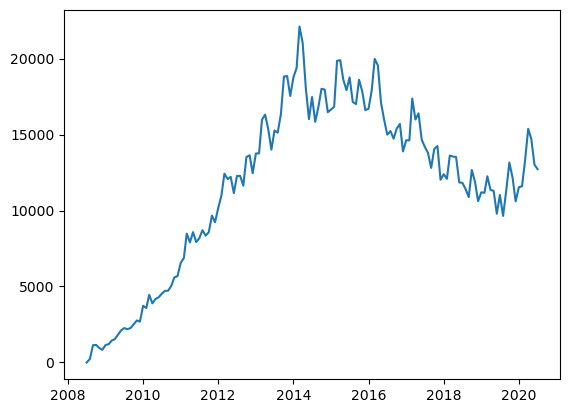

In [44]:
plt.plot(reshaped_df.index, reshaped_df.java)

- **Or equivalently**,
 ```python  
 plt.plot(reshaped_df.index, reshaped_df['java'])
 ```

### Styling the Chart
Enhance chart readability with these methods:
- `plt.figure(figsize=(16,10))` — resize the chart (width=16, height=10)
- `plt.xticks()` and `plt.yticks()` — configure axis tick labels
- `plt.xlabel()` and `plt.ylabel()` — add axis labels with font sizes
- `plt.ylim()` — set limits for the y-axis (e.g., lower bound 0)

Example:
```python
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.show()
```

### Challenge: Plot Java and Python Side by Side
Try plotting both the Java and Python programming languages on the same chart to compare their popularity trends:

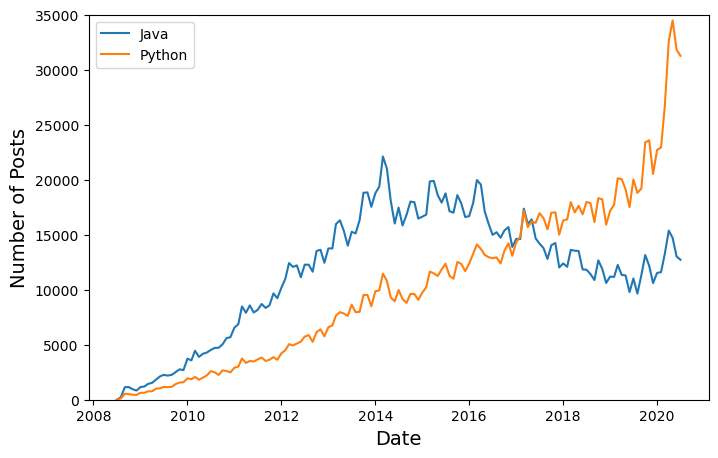

In [46]:
plt.figure(figsize=(8,5))
plt.plot(reshaped_df.index, reshaped_df.java, label='Java')
plt.plot(reshaped_df.index, reshaped_df.python, label='Python')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.legend()
plt.show()

## Multi-Line Charts with Matplotib

To plot the popularity of **all programming languages** in the DataFrame without repeating `.plot()` many times, use a `for` loop to iterate over each column. Add labels for each line and customize the line thickness for better visibility. Finally, include a legend to identify each language by color.

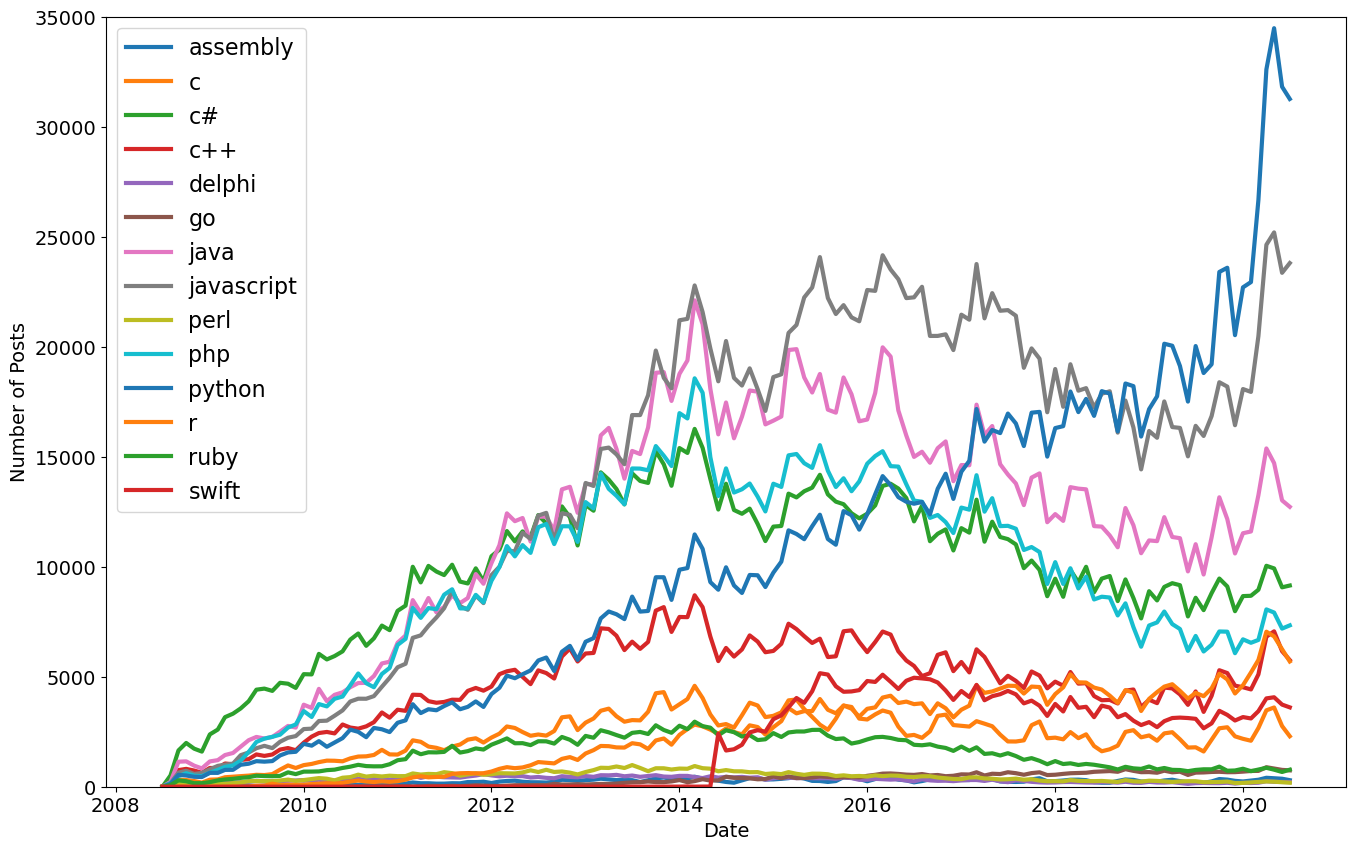

In [47]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)
plt.show()

> This produces a clear, multi-line chart with a legend indicating which line corresponds to which programming language.


## Smoothing Out Time-Series Data with Rolling Mean
Time-series data often contains noise with many up-and-down spikes, making trends hard to spot. One common technique to clarify a trend is to smooth the data by averaging over a moving window of observations, called a *rolling mean*.
    
Pandas provides convenient methods to calculate this: [.rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) to create the sliding window and
    [.mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html) to compute the average. Chaining these methods lets us create a smoothed DataFrame.

In [48]:
# Calculate rolling mean with a window of 6 observations
roll_df = reshaped_df.rolling(window=6).mean()

In [51]:
roll_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


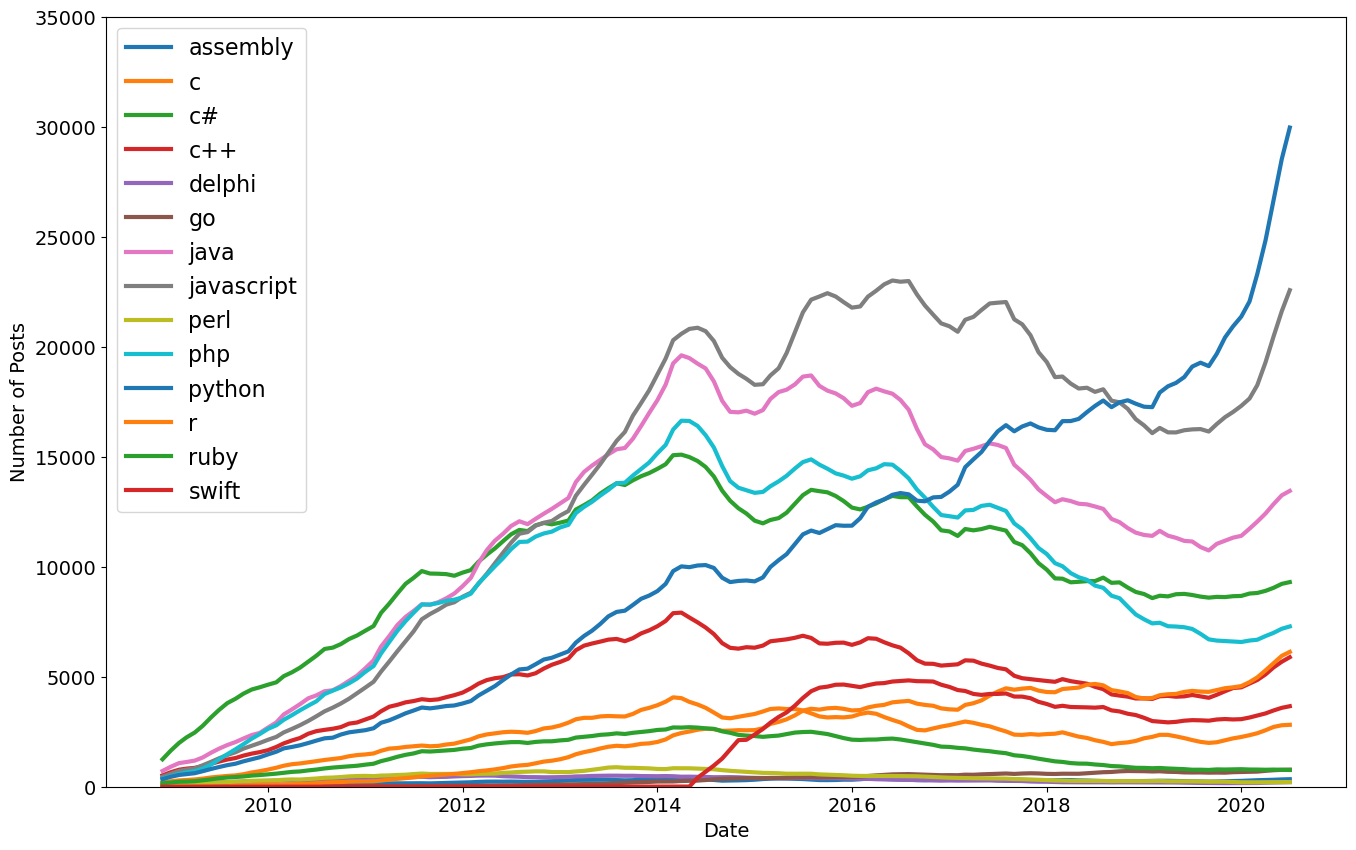

In [52]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# Plot the smoothed DataFrame instead of the original
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)
plt.show()

#### Try changing the `window` argument to 3 or 12 to see how it affects the smoothness of the chart!

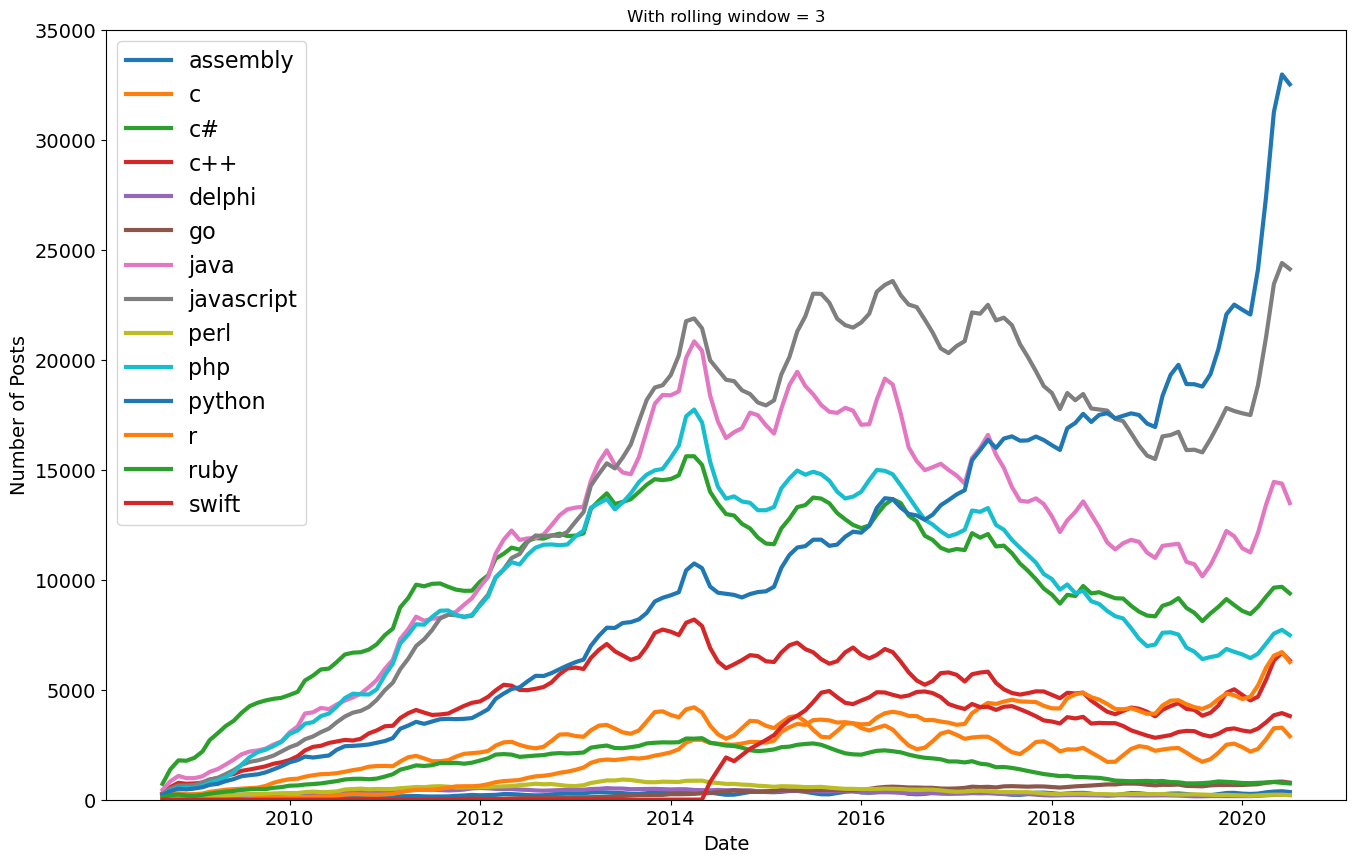

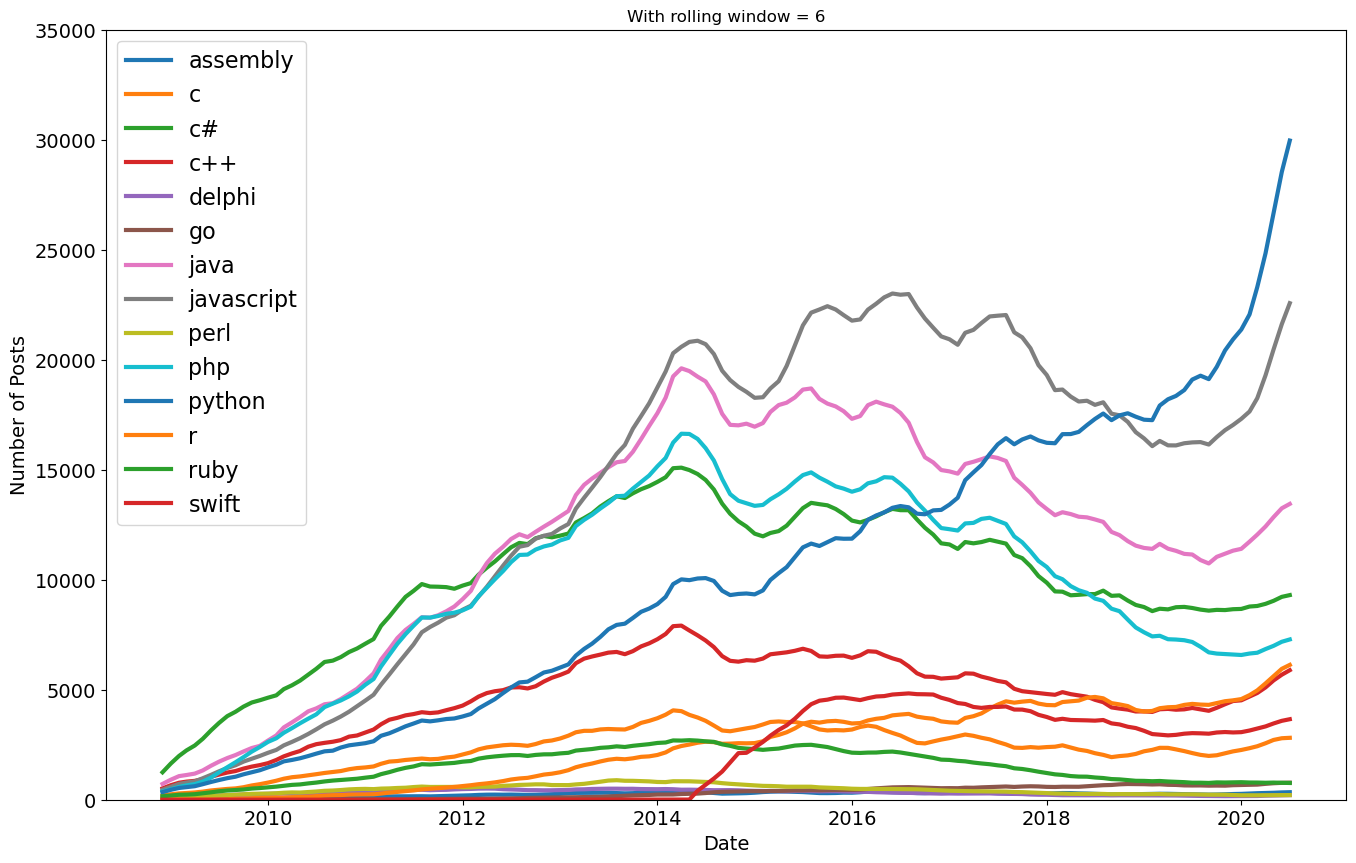

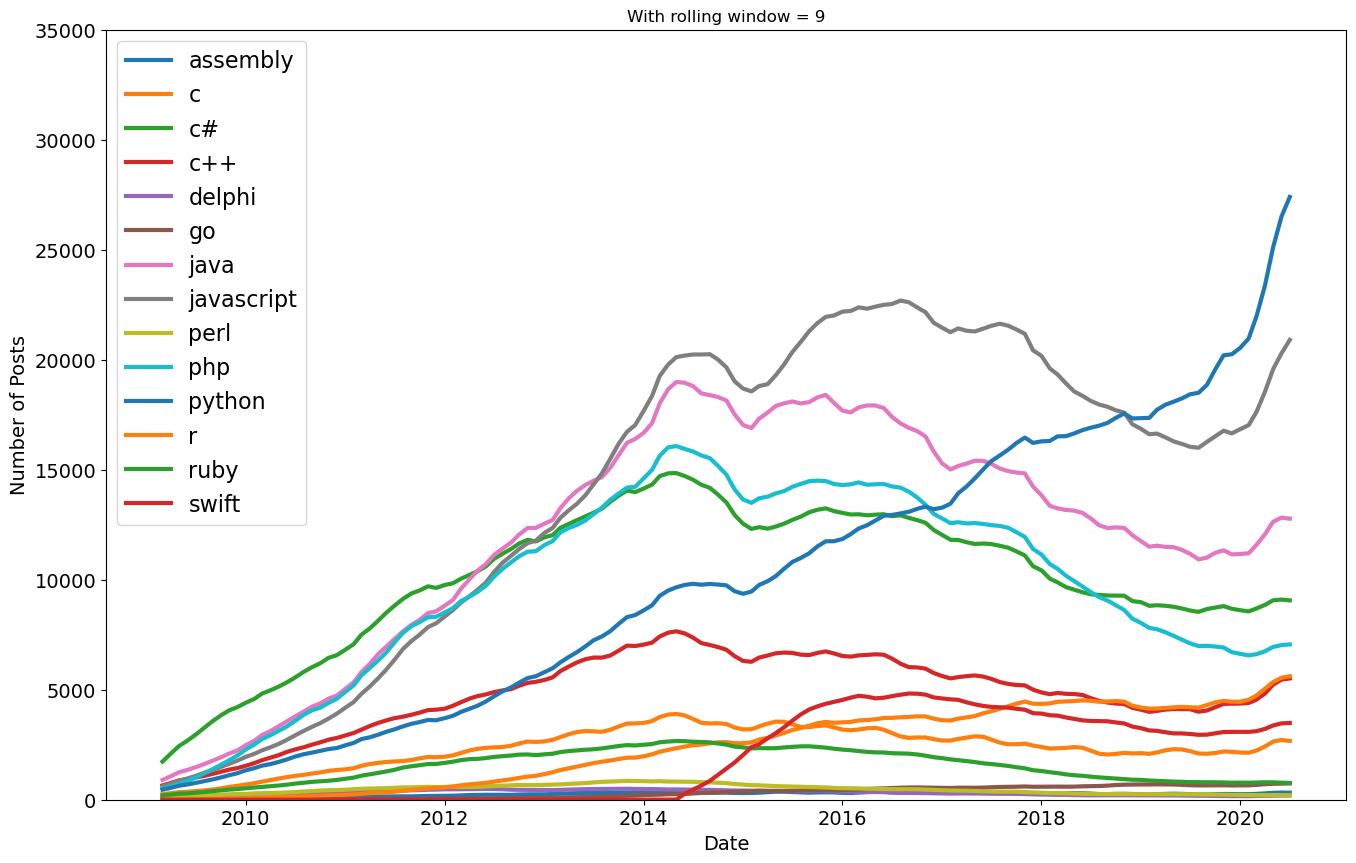

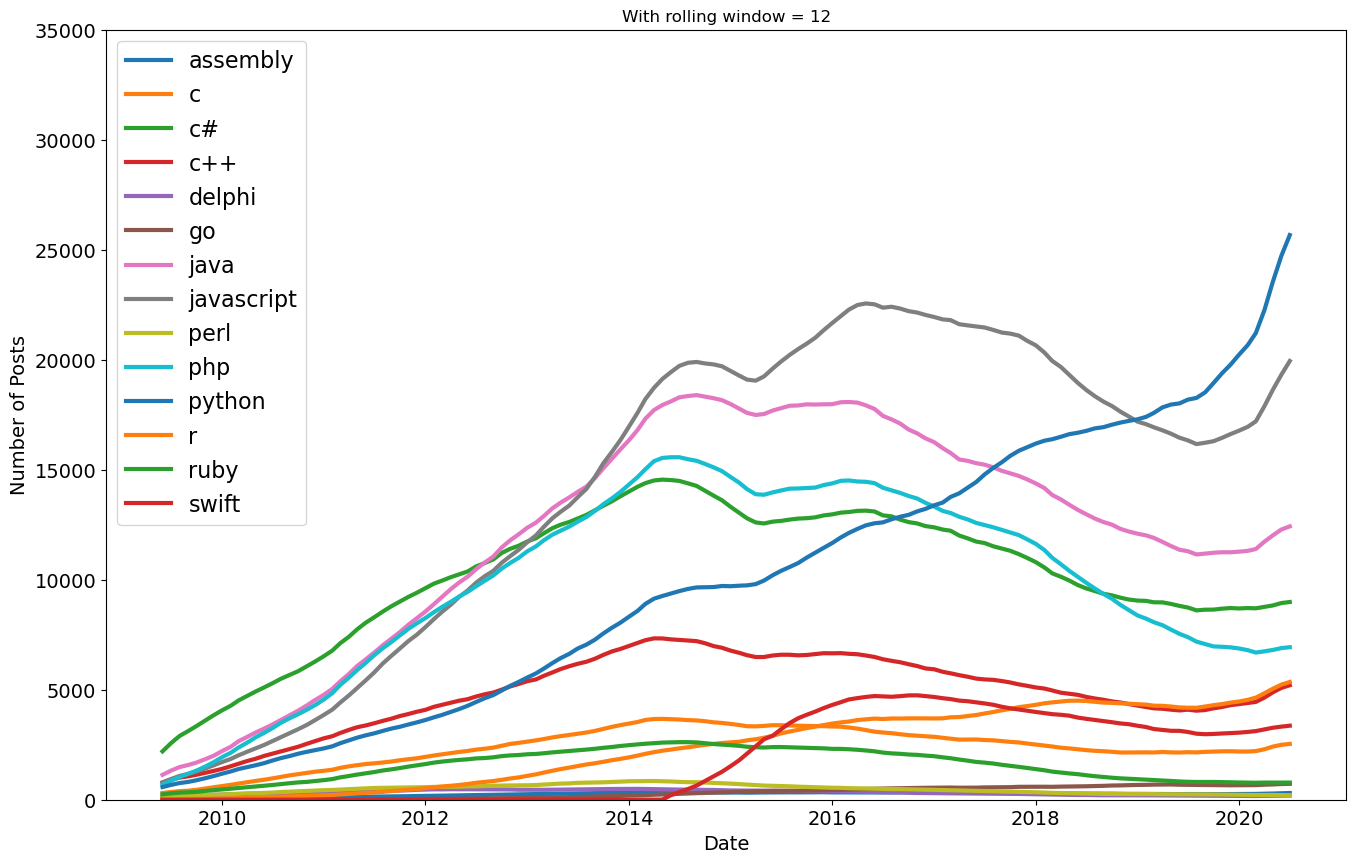

In [56]:
for win in [3, 6, 9, 12]:
    plt.figure(figsize=(16,10))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Posts', fontsize=14)
    plt.ylim(0, 35000)
    plt.title(f"With rolling window = {win}")
    # Plot the smoothed DataFrame instead of the original
    roll = reshaped_df.rolling(window=win).mean()
    for column in roll_df.columns:
        plt.plot(roll.index, roll[column], 
                 linewidth=3, label=roll[column].name)
    plt.legend(fontsize=16)
    plt.show()

## Learning Points & Summary
we've covered several key techniques and tools including:

- Using `.groupby()` to explore the number of posts and entries per programming language.
- Converting string dates to Datetime objects with `to_datetime()` for easier plotting and time-based operations.
- Reshaping our DataFrame by converting categories (programming languages) to columns using `.pivot()`.
- Using `.count()` and `.isna().values.any()` to detect NaN values, which we then replaced using `.fillna()`.
- Creating multiple line charts efficiently with `.plot()` inside a for-loop.
- Styling charts by adjusting figure size, axis labels, tick sizes, and axis bounds.
- Adding a legend to help identify which line corresponds to which programming language by color.
- Smoothing out noisy time-series data with a rolling mean using `.rolling(window).mean()` and plotting the smoothed data to better identify trends over time.

These techniques combine Pandas and Matplotlib functionality to take raw data through cleaning, reshaping, and visualization steps—essential skills for any data science project.